## *2018deSouza*
- Title: "Pre-Columbian earth-builders settled along the entire southern rim of the Amazon"
- DOI: 10.1038/s41467-018-03510-7
- The most promising image on page 2 of the article is site *Z-Mt-04* "showing the wavy pattern of ditch construction", wavy circular ditch approximately 300 m in diameter.
- The paper's supplemetary information lists the latitude/longitude coordinates for this site as:
    - Latitude: -57.6760
    - Longitude-9.8654.
- On [opentopography](https://portal.opentopography.org/datasets) these coordinates hone in on Serra Dos Apiac on the Grosso Plateau in central Brazil, to the west of Teles Pires river.

In [206]:
# opentopography has 9 datasets for this area:
    
opentopography_datasets = {
    "Shuttle Radar Topography Mission (SRTM) Global": {
        "Name": "Shuttle Radar Topography Mission (SRTM) Global",
        "Collection Platform": "Satellite Data",
        "Products Available": "Raster",
        "Survey date": "2000-02-11Z - 2000-02-22Z",
        "Dataset URL": "https://portal.opentopography.org/datasetMetadata?otCollectionID=OT.042013.4326.1"
    },
    "ALOS World 3D - 30m": {
        "Name": "ALOS World 3D - 30m",
        "Collection Platform": "Satellite Data",
        "Products Available": "Raster",
        "Survey date": "2006-01-01Z - 2011-01-01Z",
        "Dataset URL": "https://portal.opentopography.org/datasetMetadata?otCollectionID=OT.112016.4326.2"
    },
    "NASADEM Global Digital Elevation Model": {
        "Name": "NASADEM Global Digital Elevation Model",
        "Collection Platform": "Satellite Data",
        "Products Available": "Raster",
        "Survey date": "2000-02-11Z - 2000-02-21Z",
        "Dataset URL": "https://portal.opentopography.org/datasetMetadata?otCollectionID=OT.032021.4326.2"
    },
    "Copernicus Global Digital Elevation Models": {
        "Name": "Copernicus Global Digital Elevation Models",
        "Collection Platform": "Satellite Data",
        "Products Available": "Raster",
        "Survey date": "2011-01-01Z - 2015-07-01Z",
        "Dataset URL": "https://portal.opentopography.org/datasetMetadata?otCollectionID=OT.032021.4326.1"
    },
    "Global Ecosystem Dynamics Investigation (GEDI) L3 Gridded Land Surface Metrics": {
        "Name": "Global Ecosystem Dynamics Investigation (GEDI) L3 Gridded Land Surface Metrics",
        "Collection Platform": "Satellite Data",
        "Products Available": "Raster",
        "Survey date": "2019-04-18Z - 2022-01-19Z",
        "Dataset URL": "https://portal.opentopography.org/datasetMetadata?otCollectionID=OT.032022.4326.1"
    },
    "Global Multi-Resolution Topography (GMRT) Data Synthesis": {
        "Name": "Global Multi-Resolution Topography (GMRT) Data Synthesis",
        "Collection Platform": "Bathymetric Data",
        "Products Available": "Raster",
        "Survey date": "1992-01-01Z",
        "Dataset URL": "https://portal.opentopography.org/datasetMetadata?otCollectionID=OT.112016.4326.1"
    },
    "Global Bathymetry and Topography at 15 Arc Sec: SRTM15+ V2.5.5": {
        "Name": "Global Bathymetry and Topography at 15 Arc Sec: SRTM15+ V2.5.5",
        "Collection Platform": "Bathymetric Data",
        "Products Available": "Raster",
        "Survey date": "2000-02-11Z - 2023-03-20Z",
        "Dataset URL": "https://portal.opentopography.org/datasetMetadata?otCollectionID=OT.122019.4326.1"
    },
    "GEBCO Global Bathymetry and Topography": {
        "Name": "GEBCO Global Bathymetry and Topography",
        "Collection Platform": "Bathymetric Data",
        "Products Available": "Raster",
        "Survey date": "2000-02-11Z - 2023-04-01Z",
        "Dataset URL": "https://portal.opentopography.org/datasetMetadata?otCollectionID=OT.122023.4326.1"
    },
    "Geomorpho90m - Global High-Resolution Geomorphometric Layers": {
        "Name": "Geomorpho90m - Global High-Resolution Geomorphometric Layers",
        "Collection Platform": "Satellite Data",
        "Products Available": "Raster",
        "Survey date": "2000-02-11Z - 2011-04-01Z",
        "Dataset URL": "https://portal.opentopography.org/dataspace/dataset?opentopoID=OTDS.012020.4326.1"
    }
}

- ORNL DAAC (Oak Ridge National Laboratory Distributed Active Archive Center)
- NASA EOSDIS (NASA Earth Observation System Data and Information System) managed by ESDIS (Earth Science Data and Information System)
- Access ORNL DAAC data using the earthaccess python package.
- QuickStart documentation: https://earthaccess.readthedocs.io/en/latest/quick-start/

In [57]:
# Imports
import os
import earthaccess
import pandas as pd
import laspy
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
from fastkml import kml
import xml.etree

In [58]:
# Establish whether earthaccess username and password are stored in environment variables and authorize

EARTHDATA_USERNAME = os.environ.get("EARTHDATA_USERNAME")
EARTHDATA_PASSWORD = os.environ.get("EARTHDATA_PASSWORD")

if EARTHDATA_USERNAME and EARTHDATA_PASSWORD:
    print("eartaccess username and password is stored as environment variables")
else:
    print("earthaccess requires username and password as environment variables")

print("---")

# attempt to authenticate earthaccess
try:
    auth = earthaccess.login()
    if auth.authenticated:
        print("Successfully authenticated with earthaccess.")
    else:
        print("Authentication failed. Check credentials.")
except Exception as e:
    print(f"An error occurred during earthaccess login: {e}")

eartaccess username and password is stored as environment variables
---
Successfully authenticated with earthaccess.


In [41]:
# Coordinates of site Z-Mt-04

LONGITUDE   = -57.6760
LATITUDE    = -9.8654
DELTA       = 0.1

bbox = (
    LONGITUDE - DELTA,
    LATITUDE - DELTA,
    LONGITUDE + DELTA,
    LATITUDE + DELTA
)

In [ ]:
# Search for ICESat-2 ATL06 data products (that contain land ice and height measurements) within the bounding box

'''
bounding_box: a tuple representing spatial bounds in the form
    (lower_left_lon, lower_left_lat, upper_right_lon, upper_right_lat)
'''              
results = earthaccess.search_data(
    short_name='ATL06',
    bounding_box=(
                  LONGITUDE - DELTA,
                  LATITUDE - DELTA,
                  LONGITUDE + DELTA,
                  LATITUDE + DELTA),
    temporal=("1999-02", "2019-03"),
    count=10
)

print(f"Number of datasets found: {len(results)}")

In [ ]:
# Use DOI (digital object identifier) to search for a specific dataset.
# Returns metadata (not granules) describing the dataset

datasets = earthaccess.search_datasets(doi="10.3334/ORNLDAAC/1644")
print(f"Number of datasets found: {len(datasets)}")

Number of datasets found: 1


In [43]:
# Search for data cranules from a specific concept ID using the precise bounding box
# Filters to exclude cloud-hosted data

results = earthaccess.search_data(
    concept_id="C2398128915-ORNL_CLOUD",
    bounding_box=bbox,
    cloud_hosted=False
)

print(f"{len(results)} matching tiles found")
inventory_files = earthaccess.download(results, "./lidar_filtered/")

2 matching tiles found


QUEUEING TASKS | :   0%|          | 0/2 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/2 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/2 [00:00<?, ?it/s]

In [ ]:
# Load the .csv inventory_file into pandas dataset

df = pd.read_csv(inventory_files[0])
print(f"Number of tiles: {len(df)}\n")
print(f"Columns: {df.columns.tolist()}\n")

print(f"First tile filename: {df.iloc[0].filename}")

Number of tiles: 3152

Columns: ['filename', 'max_lat', 'min_lat', 'max_lon', 'min_lon', 'file_type', 'file_size_mb', 'file_format', 'version', 'created', 'utmzone', 'srs']

First tile filename: ANA_A01_2017_laz_0.laz


In [ ]:
# To unzip the .kmz file to a .kml (Keyhole Markup Language) run the following:
# !unzip lidar_filtered/cms_brazil_lidar_tile_inventory.kmz -d kmz_extracted

In [63]:
inventory_files[1]

'lidar_filtered/cms_brazil_lidar_tile_inventory.kmz'

In [65]:
# Extract metadata from LiDAR tile inventory
# Parse KML file to extract the number of <Placemark> elements (KML is an XML-based format to represent geographic features (e.g. points, polygons))

tree = xml.etree.ElementTree.parse("lidar_filtered/kmz_extracted/cms_brazil_lidar_tile_inventory.kml")
root = tree.getroot()

# KML uses namespaces, we need to handle that
ns = {'kml': 'http://www.opengis.net/kml/2.2'}

placemarks = root.findall(".//kml:Placemark", ns)
print(f"Number of placemarks: {len(placemarks)}")


Number of placemarks: 3152


In [71]:
# Find and print the coordinates of the first placemark

first = placemarks[0]
polygon = first.find(".//kml:coordinates", ns)

if polygon is not None:
    coords_text = polygon.text.strip()
    coords = [
        tuple(map(float, coord.split(",")))
        for coord in coords_text.split()
    ]
    for coord in coords:
        print(coord)

(-55.00192748, -3.372548038, 0.0)
(-54.99291243, -3.372548038, 0.0)
(-54.99291243, -3.363488118, 0.0)
(-55.00192748, -3.363488118, 0.0)
(-55.00192748, -3.372548038, 0.0)


In [72]:
# Extracts coordinates from a KML Placemark, calculates its bounding box in degrees, and converts the tile's width and height to metres using a latitude-based approximation.

def extract_coords_from_placemark(placemark, ns):
    """
    Extracts the (lon, lat) coordinates from a KML Placemark.

    Args:
        placemark (Element): An XML Element representing the Placemark.
        ns (dict): Namespace dictionary for KML parsing.

    Returns:
        List[Tuple[float, float]]: List of (lon, lat) coordinate tuples (altitude is ignored).
    """
    polygon = placemark.find(".//kml:coordinates", ns)
    if polygon is None:
        return []

    coords_text = polygon.text.strip()
    coords = [
        tuple(map(float, coord.split(",")))[:2]  # ignore altitude
        for coord in coords_text.split()
    ]
    return coords


def get_tile_extent(coords):
    """
    Given a list of (lon, lat) coordinates, returns the bounding box and width/height in degrees.

    Args:
        coords (List[Tuple[float, float]]): List of (lon, lat) tuples.

    Returns:
        Dict: Dictionary with min/max lat/lon and width/height in degrees.
    """
    lons = [c[0] for c in coords]
    lats = [c[1] for c in coords]

    min_lon, max_lon = min(lons), max(lons)
    min_lat, max_lat = min(lats), max(lats)

    return {
        "min_lon": min_lon,
        "max_lon": max_lon,
        "min_lat": min_lat,
        "max_lat": max_lat,
        "width_deg": max_lon - min_lon,
        "height_deg": max_lat - min_lat
    }


# Example usage
coords = extract_coords_from_placemark(placemarks[0], ns)
if coords:
    print("Coordinates:")
    for c in coords:
        print(c)

    extent = get_tile_extent(coords)
    print("\nTile extent:")
    for k, v in extent.items():
        print(f"{k}: {v}")

import math

def degrees_to_metres(width_deg, height_deg, latitude):
    """
    Converts width and height in degrees to metres at a given latitude.

    Args:
        width_deg (float): Difference in longitude (degrees)
        height_deg (float): Difference in latitude (degrees)
        latitude (float): Central latitude (in degrees) of the tile

    Returns:
        Tuple[float, float]: (width_m, height_m)
    """
    # Constants
    metres_per_deg_lat = 111_320  # approximately constant
    metres_per_deg_lon = 111_320 * math.cos(math.radians(latitude))

    width_m = width_deg * metres_per_deg_lon
    height_m = height_deg * metres_per_deg_lat
    return width_m, height_m

centre_lat = (extent["min_lat"] + extent["max_lat"]) / 2
width_m, height_m = degrees_to_metres(extent["width_deg"], extent["height_deg"], centre_lat)

print("---")
print(f"Width:  {width_m:.2f} m")
print(f"Height: {height_m:.2f} m")

Coordinates:
(-55.00192748, -3.372548038)
(-54.99291243, -3.372548038)
(-54.99291243, -3.363488118)
(-55.00192748, -3.363488118)
(-55.00192748, -3.372548038)

Tile extent:
min_lon: -55.00192748
max_lon: -54.99291243
min_lat: -3.372548038
max_lat: -3.363488118
width_deg: 0.009015050000002134
height_deg: 0.009059920000000332
---
Width:  1001.82 m
Height: 1008.55 m


In [ ]:
# Determine which tile is closest to a specified lat/long location

def haversine(lon1, lat1, lon2, lat2):
    # Approximate great-circle distance in km
    R = 6371.0
    lon1, lat1, lon2, lat2 = map(math.radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = math.sin(dlat/2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon/2)**2
    return R * 2 * math.asin(math.sqrt(a))

# Set reference point (e.g., centre of bbox)
ref_lon = (bbox[0] + bbox[2]) / 2
ref_lat = (bbox[1] + bbox[3]) / 2

min_dist = float('inf')
closest_placemark = None

for placemark in placemarks:
    coords_elem = placemark.find(".//kml:coordinates", ns)
    if coords_elem is not None:
        coords_text = coords_elem.text.strip()
        coords = [
            tuple(map(float, c.split(",")))
            for c in coords_text.split()
        ]
        if coords:
            # Compute simple centroid (average of points)
            avg_lon = sum(p[0] for p in coords) / len(coords)
            avg_lat = sum(p[1] for p in coords) / len(coords)
            dist = haversine(ref_lon, ref_lat, avg_lon, avg_lat)
            if dist < min_dist:
                min_dist = dist
                closest_placemark = placemark

print(f"Closest placemark is {closest_placemark.find('kml:name', ns).text.strip()} at {min_dist:.2f} km away")


Closest placemark is COT_A01_2011_laz_2.laz at 136.06 km away


In [13]:
base_url = "https://daac.ornl.gov/daacdata/cms/LIDAR_BRAZIL/data"
filename = df.iloc[0]["filename"]
site_code = filename.split("_")[0]
url = f"{base_url}/{site_code}/{filename}"


In [ ]:
# https://daac.ornl.gov/daacdata/cms/LiDAR_Forest_Inventory_Brazil/data/ANA_A01_2017_laz_0.laz

In [14]:
print(EARTHDATA_USERNAME)
print(EARTHDATA_PASSWORD)

james.byers
xoxrid-2sinta-pudsUj


In [15]:
import requests
from urllib.parse import urlparse

filename = "ANA_A01_2017_laz_0.laz"
url = f"https://daac.ornl.gov/daacdata/cms/LiDAR_Forest_Inventory_Brazil/data/{filename}"

with requests.Session() as session:
    # Enable netrc authentication for urs.earthdata.nasa.gov
    session.auth = None  # triggers use of ~/.netrc
    session.headers.update({"User-Agent": "earthdata-download-script"})

    # First request to the file URL (this will redirect)
    r = session.get(url, allow_redirects=True)

    if r.status_code == 200:
        with open(filename, "wb") as f:
            f.write(r.content)
        print(f"Downloaded {filename}")
    else:
        print(f"Failed with status {r.status_code}")
        print(r.url)
        print(r.text[:500])


Downloaded ANA_A01_2017_laz_0.laz


In [204]:
import pdal
import json
import numpy as np
import matplotlib.pyplot as plt

# Define the PDAL pipeline
pipeline_def = {
    "pipeline": [
        "ANA_A01_2017_laz_0.laz",
        {
            "type": "filters.range",
            "limits": "Z[0:]"  # Optional: filter non-physical points
        }
    ]
}

pipeline = pdal.Pipeline(json.dumps(pipeline_def))
pipeline.execute()
arrays = pipeline.arrays

# Extract the first (and usually only) array
points = arrays[0]
x = points['X']
y = points['Y']
z = points['Z']

# Basic plot
plt.figure(figsize=(6, 6))
plt.scatter(x, y, c=z, s=0.1, cmap="viridis")
plt.title("PDAL: LiDAR tile ANA_A01_2017")
plt.xlabel("Easting")
plt.ylabel("Northing")
plt.colorbar(label="Elevation (Z)")
plt.axis("equal")
plt.show()


RuntimeError: Unable to open stream for 'ANA_A01_2017_laz_0.laz' with error 'No such file or directory'

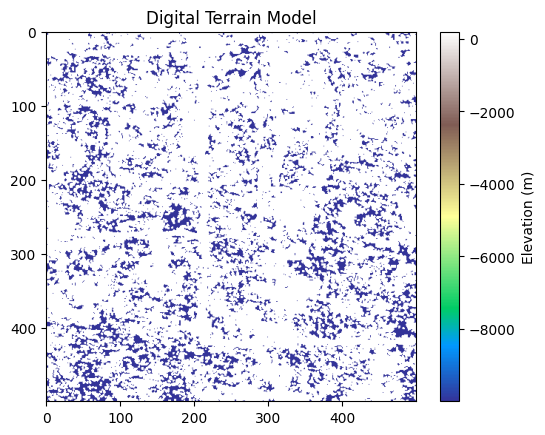

In [203]:
import rasterio
import matplotlib.pyplot as plt

with rasterio.open("interesting.tif") as src:
    data = src.read(1)  # Read the first (and probably only) band
    plt.imshow(data, cmap='terrain')
    plt.colorbar(label='Elevation (m)')
    plt.title("Digital Terrain Model")
    plt.show()


In [79]:
import ee
import os
import openai
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import base64

# Initialise Earth Engine (you must have authenticated previously)
ee.Initialize(project='ee-jamesbyers92')

# Ensure your OpenAI key is set
openai.api_key = os.getenv("OPENAI_API_KEY_openai_to_z")

# Print available OpenAI API models
models = openai.models.list()
# for model in models:
#     print(model.id)

In [72]:
# Example site from de Souza et al. 2018 supplementary table
# Mt07 I: Large circular enclosure with nearby structures
site_name = "Mt07"
latitude = -9.3501
longitude = -59.3228
padding_deg = 0.025  # roughly 5km

# Define bounding box (lat/lon rectangle)
aoi = ee.Geometry.BBox(
    longitude - padding_deg,
    latitude - padding_deg,
    longitude + padding_deg,
    latitude + padding_deg
)

# Update this if your filename differs
filename = f"{site_name}_2022_rgb.tif"
tif_path = f"data/raw/{filename}"
png_path = f"data/raw/{site_name}_2022.png"

In [73]:
def get_s2_composite(start, end, aoi):
    collection = (
        ee.ImageCollection("COPERNICUS/S2_SR")
        .filterBounds(aoi)
        .filterDate(start, end)
        .filter(ee.Filter.lt("CLOUDY_PIXEL_PERCENTAGE", 20))
    )
    return collection.median().clip(aoi).select(['B4', 'B3', 'B2'])  # RGB

In [74]:
# Example NICFI monthly basemap for July 2017
image = ee.Image("projects/planet-nicfi/assets/basemaps/americas/2017_07")
image = image.clip(aoi)

In [78]:
# Choose dry season
date_start, date_end = "2016-06-01", "2017-09-01"
image = get_s2_composite(date_start, date_end, aoi)

def export_image(image, name, aoi):
    task = ee.batch.Export.image.toDrive(
        image=image,
        description=f"{name}_export",
        folder="GEE_exports",
        fileNamePrefix=name,
        region=aoi,
        scale=10,
        maxPixels=1e9
    )
    task.start()
    print(f"Started export task: {name}")

export_image(image, f"{site_name}_2022_rgb", aoi)

Started export task: Mt07_2022_rgb


In [49]:
# from pydrive.auth import GoogleAuth
# from pydrive.drive import GoogleDrive

# gauth = GoogleAuth()
# gauth.LocalWebserverAuth()
drive = GoogleDrive(gauth)

# Find and download file
filename = f"{site_name}_2022_rgb.tif"
file_list = drive.ListFile({'q': f"title = '{filename}'"}).GetList()

if not file_list:
    raise FileNotFoundError(f"{filename} not found in Google Drive")

file = file_list[0]
local_path = f"data/raw/{filename}"
os.makedirs("data", exist_ok=True)
file.GetContentFile(local_path)

# Convert .tif to PNG
with rasterio.open(local_path) as src:
    img = src.read([1, 2, 3])  # RGB bands
    img = np.clip(img / 3000, 0, 1)  # Reflectance to 0–1
    img = np.transpose(img, (1, 2, 0))  # HWC

# Save as PNG
img_uint8 = (img * 255).astype(np.uint8)
Image.fromarray(img_uint8).save(f"data/raw/{site_name}_2022.png")


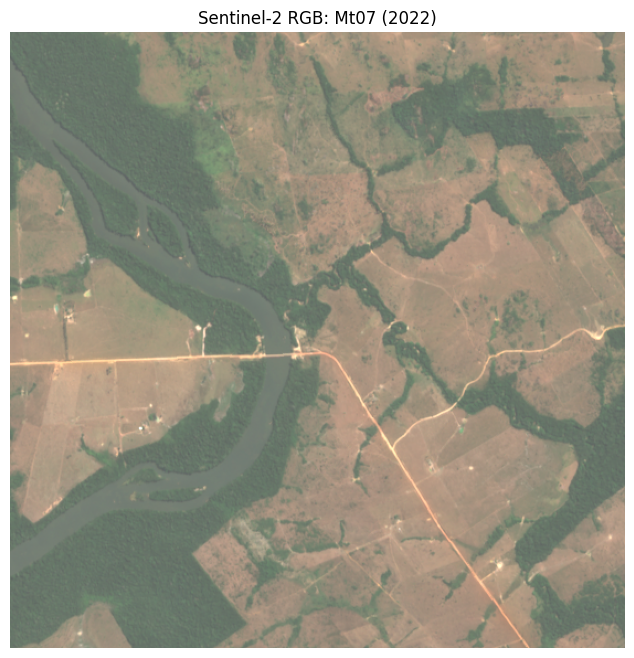

In [76]:
# Load the .tif image
with rasterio.open(tif_path) as src:
    img = src.read([1, 2, 3])  # RGB
    img = np.clip(img / 3000, 0, 1)  # normalise reflectance to [0, 1]
    img = np.transpose(img, (1, 2, 0))  # reshape to (H, W, C)

# Convert and save as PNG (uint8)
img_uint8 = (img * 255).astype(np.uint8)
Image.fromarray(img_uint8).save(png_path)

# ✅ Display in notebook
plt.figure(figsize=(8, 8))
plt.imshow(img_uint8)
plt.title(f"Sentinel-2 RGB: {site_name} (2022)")
plt.axis("off")
plt.show()

In [ ]:
# Read PNG image as base64
img_path = f"data/raw/{site_name}_2022.png"
with open(img_path, "rb") as f:
    img_b64 = base64.b64encode(f.read()).decode("utf-8")
img_uri = f"data:image/png;base64,{img_b64}"

# Send to GPT-4o
response = openai.chat.completions.create(
    model="o4-mini",
    messages=[
        {
            "role": "user",
            "content": [
                {"type": "text", "text": f"This is a Sentinel-2 image of an archaeological site in the southern Amazon (approx. {latitude}, {longitude}). Do you see any evidence of circular enclosures, ditches, or anthropogenic features indicative of pre-Columbian settlement?. There is a semicircular ditch near the edge of the river."},
                {"type": "image_url", "image_url": {"url": img_uri}},
            ],
        }
    ],
    # max_tokens=1000,
)

print(response.choices[0].message.content)


At Sentinel-2’s ca. 10 m/pixel resolution there really aren’t any obvious “crop‐circle”-style enclosures or full rings like the classic Acre geoglyphs further west. What you see in the cleared (tan) areas to the east of the main river bend are almost all straight‐edged, grid-style field boundaries and roads, with only one feature that departs from the rectilinear pattern:

• Right at the large river meander (≈ –9.3501, –59.3228), on the inside of the curve, there is a roughly semicircular arc of darker ground/trees where the forest meets the open fields.  On the false-color composites it stands out as a swept-out crescent of vegetation with a radius on the order of a few hundred meters.  That is the “semicircular ditch” you noted.

However, without higher-resolution imagery or LiDAR it is almost impossible to tell from Sentinel-2 alone whether that crescent is
  – a natural oxbow or meander scar in the floodplain,
  – remnant riparian vegetation clinging to an old channel,
  – or a del